# Create an arrangement of faces

In [1]:
import matplotlib.pyplot as plt
from facer import facer
import cv2

Loading face detector and landmark prediction models...
Done, models loaded.


## Load the average face images

In [2]:
# path_to_faces = "./af_3"
path_to_faces = "./average_faces_v3/"
faces = facer.load_images(path_to_faces, verbose=False)
faces = {key.rsplit("/", 1)[-1].rsplit(".")[0].split("_", 2)[2]:value for key, value in faces.items()}

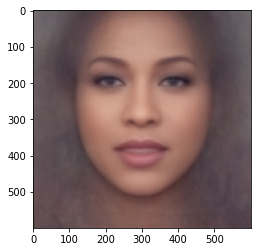

In [3]:
plt.imshow(faces["RAP_FEMALE"])

## Arrange the faces into a grid

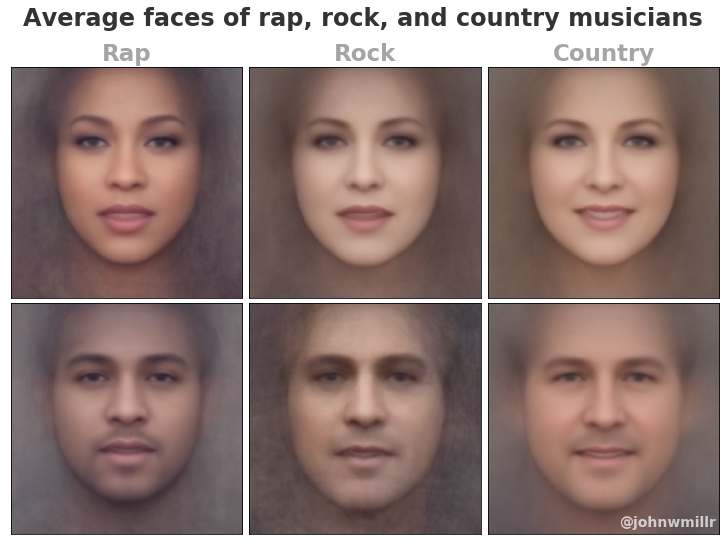

In [12]:
kwargs = {"figsize": (10, 8), "sharex": True, "sharey": True}
fig, axs = plt.subplots(nrows=2, ncols=3, **kwargs)
keys = ["RAP_FEMALE", "ROCK_FEMALE", "COUNTRY_FEMALE",
        "RAP_MALE", "ROCK_MALE", "COUNTRY_MALE"]
n = 0
for row in axs:
    for col in row:
        image = faces[keys[n]]
        col.imshow(image)
        label = keys[n].split("_")[0]
        label = label[0] + label[1:].lower()
        
        if n < 3:
            kwargs = {"color": "gray", "alpha": 0.7, "weight": "heavy"}
            col.set_title(label, fontsize=23, **kwargs)           
        col.set(**{"xticks": [], "yticks": []})
        if n == 5:
            kwargs = {"fontsize": 14, "color": "white", "alpha": 0.7, "weight": "heavy"}
            col.text(590, 580, "@johnwmillr", **kwargs, ha='right')
        n += 1
plt.tight_layout(pad=0.4)
plt.subplots_adjust(bottom=0.12)
title = "Average faces of rap, rock, and country musicians"
kwargs = {"fontsize": 24, "color": "black", "alpha": 0.8, "weight": "heavy"}
plt.suptitle(title, y=1.06, **kwargs)
plt.savefig("./AverageFaces_RapRockCountry.png", dpi=300, bbox_inches="tight")
plt.show()